<a href="https://colab.research.google.com/github/Naveensani/Machine-learning-for-battery-electrolyte-solvents/blob/main/ES_LiR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
data_df = pd.read_csv('/content/Data - Sheet1.csv')

In [ ]:
data_df.head()

,IonicRadius(Å),Electronegativity,AtomicWeight(u),HOMOenergy,LUMOenergy,TotalDipole,TotalEnergy,BoilingPoint,FlashingPoint,MeltingPoint,MolecularWeight,Density,CoordinationEnergy
0,0.76,0.98,6.94,-6.265196,0.293367,0.108254,-6259.724643,31.0,-35.0,-85.6,68.07,0.940,-1.376087
1,0.76,0.98,6.94,-7.685002,0.087234,1.091592,-6233.350598,34.0,-26.0,-100.0,60.05,0.974,-2.298388
2,0.76,0.98,6.94,-8.021337,0.914998,-1.054855,-9317.849120,244.0,152.0,38.0,88.06,1.320,-2.422717
3,0.76,0.98,6.94,-7.766342,1.113763,-0.075170,-9350.680139,90.0,17.0,4.0,90.08,1.070,-2.165763
4,0.76,0.98,6.94,-6.484090,1.782747,0.000007,-8372.272328,101.0,12.0,11.5,88.11,1.034,-1.874273


In [ ]:
X = data_df.drop(['CoordinationEnergy'],axis=1)
y = data_df['CoordinationEnergy']

In [ ]:
print(X)

     IonicRadius(Å)  Electronegativity  AtomicWeight(u)  HOMOenergy  \
0              0.76               0.98            6.940   -6.265196   
1              0.76               0.98            6.940   -7.685002   
2              0.76               0.98            6.940   -8.021337   
3              0.76               0.98            6.940   -7.766342   
4              0.76               0.98            6.940   -6.484090   
..              ...                ...              ...         ...   
127            0.72               1.31           24.305   -8.016414   
128            0.72               1.31           24.305   -7.647719   
129            0.72               1.31           24.305   -6.904810   
130            0.72               1.31           24.305   -6.916794   
131            0.72               1.31           24.305   -6.494512   

     LUMOenergy   TotalDipole   TotalEnergy  BoilingPoint  FlashingPoint  \
0      0.293367  1.082538e-01  -6259.724643          31.0          -35.

In [ ]:
best_models = []

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
import itertools   

In [ ]:
# Iterate over all possible combinations of predictor variables
for i in range(1, len(X.columns)+1):
    for comb in itertools.combinations(X.columns, i):
        # Fit a multiple linear regression model using the current combination of predictor variables
        model = LinearRegression()
        scores = cross_val_score(model, X[list(comb)], y, scoring='neg_mean_squared_error', cv=kf)
        # print("score:", scores)
        # Calculate the average neg_mean_squared_error across the folds
        nmse = scores.mean()
        # Store the model if it has the highest R-squared value so far
        if len(best_models) == 0 or nmse > best_models[0]['nmse']:
            best_models = [{'predictors': comb, 'nmse': nmse}]
        elif r2 == best_models[0]['nmse']:
            best_models.append({'predictors': comb, 'nmse': nmse})

In [ ]:
# Print the best models
for model in best_models:
    print('Predictor variables:', model['predictors'])
    print('neg_mean_squared_error:', model['nmse'])

Predictor variables: ('Electronegativity', 'LUMOenergy', 'FlashingPoint', 'MolecularWeight', 'Density')
R-squared: -0.8277001206693486


In [ ]:
X_new = data_df.loc[:, ['Electronegativity', 'LUMOenergy', 'FlashingPoint', 'MolecularWeight', 'Density']] #choose the best one from what we get above
y_new = data_df['CoordinationEnergy']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new, y_new, test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[-5.46436994 -0.59464194 -1.85180448 -2.14220418 -2.1073704  -5.98722958
 -5.96312379 -6.434673   -0.44066983 -5.74470888 -6.38149539 -1.74190956
 -5.72321105 -6.21749874 -1.21211081 -1.42930856 -5.88036189 -6.33007314
 -1.80506732 -2.56114845 -1.55872844 -2.7413339  -6.26157515 -0.18358273
 -2.14573662 -2.16055873 -1.94367958 -1.34688952 -2.01439983 -4.91739342
 -2.70033113 -8.68226078 -1.52826774 -1.67440426 -6.67635461 -1.66941431
 -1.18759844 -6.2758379  -3.62027029 -1.27871034]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8425405141752846

Text(0.5, 1.0, 'Actual Vs Predicted')

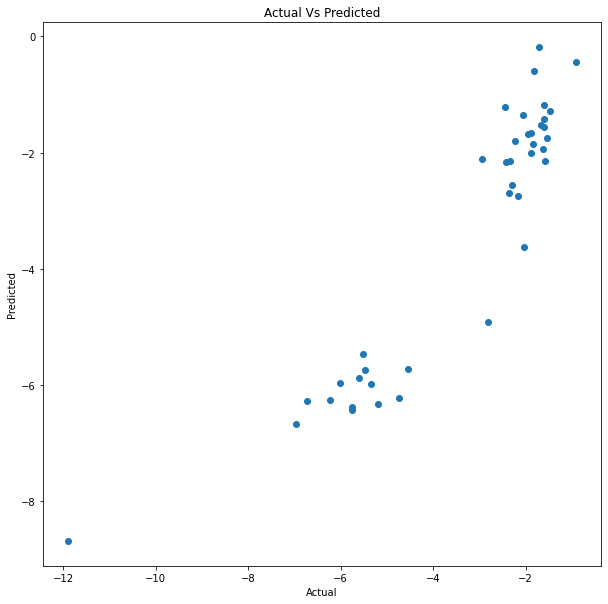

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')

In [ ]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, "Predicted Value":y_pred, 'difference':y_test - y_pred})
pred_y_df[0:100]

,Actual Value,Predicted Value,difference
93,-5.519170,-5.464370,-0.054800
66,-1.817927,-0.594642,-1.223285
26,-1.845060,-1.851804,0.006744
8,-1.583207,-2.142204,0.558997
30,-2.936907,-2.107370,-0.829537
91,-5.333120,-5.987230,0.654109
109,-6.002407,-5.963124,-0.039283
100,-5.753997,-6.434673,0.680676
44,-0.917829,-0.440670,-0.477159
101,-5.481747,-5.744709,0.262962
